#Projeto fim a fim utilizando Regressão Linear
---

# 1.0 Introdução

O dataset utilizado possui notas dos alunos de vários cursos da UFRN do ano de 2015 a 2017. A ideia é achar a relação entre as notas da primeira unidade e da segunda unidade da matéria de Cálculo I.

Para padronizar o conteúdo estudade em cada unidade pelos alunos, será selecionado apenas os alunos do curso de Ciências e Tecnologia, visto que a amostra é um conjunto de dados com uma quantidade significante.

## 1.1 Medida de desempenho

# 2.0 Carregando os dados

## 2.1 Acesar arquivo do drive

In [2]:
#1. Install a Drive FUSE wrapper google-drive-ocamlfuse.
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

gpg: keybox '/tmp/tmpp70mh7zo/pubring.gpg' created
gpg: /tmp/tmpp70mh7zo/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
#2. Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [3]:
#3. Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
#4. Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# commando to umount 
# !fusermount -u ML

In [0]:
import os
os.chdir("/content/")

In [3]:
!ls

adc.json  datasets  drive  sample_data


## 2.2 Carregando os arquivos locais

In [0]:
!cp -r drive/Mestrado/Primeiro/MachineLearning/MyActivities/LinearRegression/datasets/ /content/

In [8]:
!ls datasets/

componentes-curriculares-presenciais.csv  matriculas
cursos-graduacao.csv			  turmas


## 2.3 Estrutura dos dados

In [0]:
import pandas as pd

In [5]:
df_matriculas = pd.DataFrame()

# importando matriculas de 2015 a 2017
for i in range(15,18):
    for j in range(1,3):
        print('20'+str(i)+str(j))
        df_matricula = pd.read_csv('datasets/matriculas/matriculas-de-20'+str(i)+str(j)+'.csv',sep=';')
        #concatena as tabelas
        df_matriculas = pd.concat([df_matriculas, df_matricula])
        
print("\nDataFrame de Matrículas:")
print(df_matriculas.shape)
display(df_matriculas.head())

20151
20152
20161
20162
20171
20172

DataFrame de Matrículas:
(4089836, 11)


,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
0,NaN,REPROVADO,8833c0e056f90497742882bfcc81b685,0.0,100300443.0,57562481,0.0,0.0,0.0,f,2.0
1,NaN,REPROVADO,8833c0e056f90497742882bfcc81b685,0.0,100300443.0,57562481,0.0,0.0,0.0,f,3.0
2,NaN,APROVADO,7a0a661326418111f7d17aab098757aa,0.0,100300443.0,57562481,8.9,8.9,0.0,f,1.0
3,NaN,APROVADO,7a0a661326418111f7d17aab098757aa,0.0,100300443.0,57562481,8.9,8.9,0.0,f,2.0
4,NaN,APROVADO,7a0a661326418111f7d17aab098757aa,0.0,100300443.0,57562481,8.9,8.9,0.0,f,3.0


Esse dataset representa a relação das matrículas em componentes dos cursos da instituição. Cada coluna significa:

- **descrição**: Situação final do discente nessa turma.
- **discente**: Identificador do discente da matrícula.
- **faltas_unidade**: Quantidade de faltas na unidade.
- **id_curso**: Identificador do curso do discente.
- **id_turma**: Identificador da turma do discente.
- **media_final**: Média final do discente.
- **nota**: Nota do discente na unidade.
- **numero_total_faltas**: Quantidade total de faltas.
- **reposição**: Indica se o discente ficou em reposição.
- **unidade**: Unidade corrente do período letivo.

In [15]:
df_matriculas.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4089836 entries, 0 to 632453
Data columns (total 11 columns):
Unnamed: 10            0 non-null float64
descricao              4089836 non-null object
discente               4089836 non-null object
faltas_unidade         3467465 non-null float64
id_curso               4068862 non-null float64
id_turma               4089836 non-null int64
media_final            3510693 non-null float64
nota                   3356750 non-null float64
numero_total_faltas    3609525 non-null float64
reposicao              3467465 non-null object
unidade                3467465 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 374.4+ MB


- A primeira coluna do dataset é formado apenas por elementos nulos;
- Apenas as colunas "descrição", "discente" e "id_turma" não possuem elementos nulos.

In [6]:
# concatenar todas as turmas de 2015 a 2017
df_turmas = pd.DataFrame()

for i in range(15,18):
    for j in range(1,3):
        print("20"+str(i)+str(j))
        f = open('datasets/turmas/turmas-20'+str(i)+str(j)+'.csv')
        d = f.read()
        d = d.replace("\n","")
        x = d.split("\";\"")
        a = []
        step = 25
        for b in range(0, len(x), step):
            a.append(x[b:b+step])
        df = pd.DataFrame(a[1:],columns=['id_turma']+a[0][1:])
        df_turmas = pd.concat([df_turmas, df])
        
# conversoes
df_turmas['id_turma'] = df_turmas.id_turma.astype(int)
df_turmas['id_componente_curricular'] = df_turmas.id_componente_curricular.astype(int)
df_turmas['ano'] = df_turmas.ano.astype(int)
df_turmas['periodo'] = df_turmas.periodo.astype(int)
        
print("\nDataFrame dos dados das Turmas:")
print(df_turmas.shape)
display(df_turmas.head())

20151
20152
20161
20162
20171
20172

DataFrame dos dados das Turmas:
(86527, 25)


,id_turma,codigo_turma,id_docente_interno,id_docente_externo,observacao,id_componente_curricular,nivel_ensino,campus_turma,local,ano,...,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
0,1217099,01,18225,,,52922,LATO SENSU,,Depto. de Oceanografia e Limnologia,2015,...,26,REGULAR,f,2015-06-01 12:53:14.625,f,,15,CONSOLIDADA,,Presencial
1,1217100,01,18695,,,52921,LATO SENSU,,Depto. de Oceanografia e Limnologia,2015,...,26,REGULAR,f,2015-10-08 16:19:21.901,f,,8,CONSOLIDADA,,Presencial
2,1217101,01,5753068,,,52925,LATO SENSU,,Depto. de Oceanografia e Limnologia,2015,...,26,REGULAR,f,2015-06-01 12:50:38.962,f,,30,CONSOLIDADA,,Presencial
3,1217102,01,,109565716,,52920,LATO SENSU,,Depto. de Oceanografia e Limnologia,2015,...,26,REGULAR,f,2015-08-26 11:48:34.146,f,,24,CONSOLIDADA,,Presencial
4,1217102,01,,109565745,,52920,LATO SENSU,,Depto. de Oceanografia e Limnologia,2015,...,26,REGULAR,f,2015-08-26 11:48:34.146,f,,24,CONSOLIDADA,,Presencial


O dataset acima possui a relação de turmas dos cursos de nível médio, técnio, graduação e pós-graduação da UFRN. Suas colunas são:
- **id_turma**: Identificador da turma.
- **codigo_turma**: Código de identificação da turma.
- **id_docente_interno**: Identificador do docente interno (id_servidor - caso seja um docente servidor da instituição).
- **id_docente_externo**: Identificador do docente externo (caso não seja um docente servidor da instituição).
- **observação**: Observação para a turma.
- **id_componente_curricular**: Identificador do componente curricular da turma.
- **nível**: Nível de ensino da turma.
- **campus_turma**: Campus onde a turma é ofertada.
- **local**: Local físico de oferta da turma.
- **ano**: Ano de oferta da turma.
- **período**: Período de oferta da turma.
- **data_início**: Data de início da turma.
- **data_fim**: Data de término da turma.
- **descrição_horário**: Descrição textual da expressão de horário.
- **total_solicitações**: Total de solicitações de matrícula cadastradas para a turma.
- **capacidade_aluno**: Capacidade de discentes na turma.
- **tipo**: Identificador para informar o tipo da Turma.
- **distância**: Condicional para informar se a turma é oferta na
modalidade a distância.
- **data_consolidação**: Data de consolidação da turma.
- **agrupadora**: Condicional para informar se a turma funciona
como agrupadora para subturmas.
- **id_turma_agrupadora**: Corresponde ao id_turma da agrupadora desta turma.
- **qtd_aulas_lançadas**: Quantitativo de aulas lançadas pelo docente.
- **situação_turma**: Situação da turma.
- **convênio**: Convênio de vínculo com a turma
- **modalidade_participantes**: Modalidade de educação para alunos destinados a turma.

In [17]:
df_turmas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86527 entries, 0 to 14471
Data columns (total 25 columns):
id_turma                    86527 non-null int64
codigo_turma                86527 non-null object
id_docente_interno          86527 non-null object
id_docente_externo          86527 non-null object
observacao                  86527 non-null object
id_componente_curricular    86527 non-null int64
nivel_ensino                86527 non-null object
campus_turma                86527 non-null object
local                       86527 non-null object
ano                         86527 non-null int64
periodo                     86527 non-null int64
data_inicio                 86527 non-null object
data_fim                    86527 non-null object
descricao_horario           86527 non-null object
total_solicitacoes          86527 non-null object
capacidade_aluno            86527 non-null object
tipo                        86527 non-null object
distancia                   86527 non-null ob

- É possível observar que esse dataset não possui dados nulos.

In [7]:
# tabela dos cursos de graduação da UFRN
cursos = pd.read_csv('datasets/cursos-graduacao.csv',sep=';')

print("Tabela dos cursos de graduação da UFRN:")
print(cursos.shape)
display(cursos.head())

Tabela dos cursos de graduação da UFRN:
(116, 23)


,id_curso,nome,id_coordenador,coordenador,situacao_curso,nivel_ensino,grau_academico,modalidade_educacao,area_conhecimento,tipo_oferta,...,campus,id_unidade_responsavel,unidade_responsavel,website,data_funcionamento,codigo_inep,dou,portaria_reconhecimento,convenio_academico,Unnamed: 22
0,2000004,ADMINISTRAÇÃO,24415.0,ANDREA CRISTINA SANTOS DE JESUS,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Sociais Aplicadas,Regular,...,Campus Currais Novos,1482,CENTRO DE ENSINO SUPERIOR DO SERIDÓ,NaN,1978-09-15,12355.0,2017-04-04,Portaria nº 272/2017 - MEC,NaN,NaN
1,15315770,ADMINISTRAÇÃO PÚBLICA,23122.0,MATILDE MEDEIROS DE ARAÚJO,ATIVO,GRADUAÇÃO,BACHARELADO,A Distância,Ciências Sociais Aplicadas,Regular,...,NaN,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,NaN,NaN,1151028.0,2014-04-11,Portaria nº 226/2014 - DIREG/MEC,NaN,NaN
2,2576632,AGRONOMIA,5758350.0,JOSE HAMILTON DA COSTA FILHO,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Ciências Agrárias,Regular,...,NaN,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,NaN,NaN,1127694.0,2018-03-02,Portaria Nº 133/2018 - MEC,NaN,NaN
3,94598200,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,5757908.0,TANIRO CHACON RODRIGUES,ATIVO,GRADUAÇÃO,TECNOLÓGICO,Presencial,Outra,Anual,...,NaN,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,NaN,NaN,1188193.0,2015-12-24,Portaria nº 1034/2015 - DIREG/MEC,NaN,NaN
4,2000005,ARQUITETURA E URBANISMO,5756800.0,GLAUCE LILIAN ALVES DE ALBUQUERQUE,ATIVO,GRADUAÇÃO,BACHARELADO,Presencial,Engenharias,Regular,...,Campus Central,445,CENTRO DE TECNOLOGIA,NaN,1973-08-13,12343.0,2015-12-30,Portaria nº 1098/2015 - DIREG/MEC,NaN,NaN


Acima tem-se a relação dos cursos de graduação, onde suas colunas são:
- **id_curso**: Identificador do curso.
- **nome**: Nome do curso.
- **id_coordenador**: Identificador do coordenador (id_servidor) do curso.
- **coordenador**: Nome do coordenador do curso.
- **situacao_curso**: Situação de controle curso.
- **nivel_ensino**: Nível de ensino do curso.
- **grau_academico**: Grau acadêmico do curso. 
- **modalidade_educacao**: Modalidade de educação em relação a forma de oferta.
- **area_conhecimento**: Área de conhecimento do curso.
- **tipo_oferta**: Tipo de oferta do curso.
- **turno**: Turno do curso.
- **tipo_ciclo_formacao**: Ciclo de formação do curso: Um ciclo ou Dois
ciclos.
- **municipio**: Município de atuação do curso.
- **campus**: Campus onde é oferecido o curso.
- **id_unidade_responsavel**: Identificador da unidade acadêmica responsável pelo curso.
- **unidade_responsavel**: Unidade acadêmica responsável pelo curso.
- **website**: Site contendo mais informação sobre o curso.
- **data_funcionamento**: Data de inicio de funcionamento do curso.
- **codigo_inep**: Código INEP do curso junto ao MEC.
- **dou**: Data da portaria de liberação do curso.
- **portaria_reconhecimento**: Portaria de reconhecimento junto ao MEC.
- **convenio_academico**: Convênio acadêmico do curso.


In [19]:
cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 23 columns):
id_curso                   116 non-null int64
nome                       116 non-null object
id_coordenador             114 non-null float64
coordenador                114 non-null object
situacao_curso             116 non-null object
nivel_ensino               116 non-null object
grau_academico             116 non-null object
modalidade_educacao        116 non-null object
area_conhecimento          116 non-null object
tipo_oferta                116 non-null object
turno                      70 non-null object
tipo_ciclo_formacao        116 non-null object
municipio                  116 non-null object
campus                     65 non-null object
id_unidade_responsavel     116 non-null int64
unidade_responsavel        116 non-null object
website                    68 non-null object
data_funcionamento         70 non-null object
codigo_inep                115 non-null float64
dou   

In [8]:
# tabela dos componentes curriculares presenciais dos cursos da UFRN
componentes = pd.read_csv('datasets/componentes-curriculares-presenciais.csv')

print("\nTabela dos componentes curriculares presenciais dos cursos:")
print(componentes.shape)
display(componentes.head())


Tabela dos componentes curriculares presenciais dos cursos:
(34951, 30)


,Unnamed: 0,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,ch_teorico,ch_pratico,ch_estagio,...,ementa,bibliografia,objetivos,conteudo,competencias_habilidades,referencias,ano_programa,periodo_programa,modalidade,curso_componente
0,0,18643,DISCIPLINA,MUT508,T,COMPOSIÇÃO EM MÚSICA POPULAR III,ESCOLA DE MÚSICA,60,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
1,1,18644,DISCIPLINA,MUT516,T,CO-REPETIÇÃO,ESCOLA DE MÚSICA,30,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
2,2,18645,DISCIPLINA,MUT520,T,CONTRABAIXO ACÚSTICO I,ESCOLA DE MÚSICA,30,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
3,3,18646,DISCIPLINA,MUT165,T,PIANO COMPLEMENTAR I,ESCOLA DE MÚSICA,15,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN
4,4,18647,DISCIPLINA,MUT167,T,PIANO COMPLEMENTAR III,ESCOLA DE MÚSICA,15,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencial,NaN


Relação de componentes curriculares oferecidos pela UFRN na modalidade de ensino presencial. Sendo as colunas:
- **id_componente**: Identificador do componente curricular.
- **tipo_componente**: Informa o tipo de componente curricular.
- **codigo**: Código do componente curricular. 
- **nivel**: Nível de ensino acadêmico.
- **nome**: Nome do componente.
- **unidade_responsavel**: Unidade acadêmica de responsabilidade sobre o componente.
- **ch_teorico**: Valor da carga horária teórica do componente.
- **ch_pratico**: Valor da carga horária prática do componente.
- **ch_estagio**: Valor da carga horária de estágio do componente.
- **ch_total**: Valor da carga horária total do componente.
- **ch_dedicada_docente**: Valor da carga horária de dedicação exclusiva do docente as turmas do componente.
- **ch_ead**: Valor da carga horária de ensino a distância do componente.
- **cr_max_ead**: Porcentagem máxima permitida de créditos de aula à distância em relação ao total de créditos.
- **permite_horario_flexivel**: Indica se o componente permite horário flexível.
- **qtd_unidades**: Número de unidades de avaliações.
- **procedimentos_avaliacao**: Procedimentos acadêmicos utilizados para avaliação das competências dos alunos sobre o componente curricular.
- **equivalencia**: Componentes equivalentes ao componente curricular.
- **pre_requisito**: Componentes pré-requisitos para o componente curricular.
- **co_requisito**: Componentes co-requisitos do componente curricular.
- **ementa**: Ementa referente ao componente curricular.
- **bibliografia**: Referências bibliográficas. 
- **objetivos**: Objetivos alcançados no cumprimento do componente.
- **conteudo**: Conteúdo descritivo do componente.
- **competencias_habilidades**: Competências e habilidade adquiridas ao término do componente curricular.
- **referencias**: Referências de estudo para o componente.
- **ano_programa**: Ano letivo do último conteúdo programático registrado.
- **periodo_programa**: Período letivo do último conteúdo programático registrado.
- **modalidade**: Modalidade de educação aplicada no componente, conforme sua natureza, se presencial ou distância.
- **curso_componente**: Lista de cursos que utilizam o componente em sua estrutura curricular.

In [21]:
componentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34951 entries, 0 to 34950
Data columns (total 30 columns):
Unnamed: 0                  34951 non-null int64
id_componente               34951 non-null int64
tipo_componente             34951 non-null object
codigo                      34951 non-null object
nivel                       34951 non-null object
nome                        34950 non-null object
unidade_responsavel         34951 non-null object
ch_teorico                  34951 non-null int64
ch_pratico                  34951 non-null int64
ch_estagio                  34951 non-null int64
ch_total                    34951 non-null int64
ch_dedicada_docente         34951 non-null int64
ch_ead                      34951 non-null int64
cr_max_ead                  34951 non-null int64
permite_horario_flexivel    34951 non-null object
qtd_unidades                28194 non-null float64
procedimentos_avaliacao     4448 non-null object
equivalencia                10332 non-null object


## 2.4 Filtrando os valores que importam

Atualmente, temos todos os dados dos anos de 2015 a 2017 dos alunos da UFRN, agora será filtrado as notas dos alunos nas turmas de Cálculo I do curso de Ciências e Tecnologia.

Para obter esses dados, primeiro será preciso o ID do curso de Ciências e Tecnologia que será obtido na tabela "cursos de graduação".

In [9]:
id_cet = cursos[cursos['nome']=='CIÊNCIAS E TECNOLOGIA'].id_curso
print("ID de CeT:"+str(id_cet.values)+"\n")

df_matriculasCeT = df_matriculas[df_matriculas['id_curso']==float(id_cet)].reset_index()

colunas = ['descricao',	'discente',	'faltas_unidade',	'id_turma',
           'media_final',	'nota',	'numero_total_faltas',	'reposicao',	'unidade']
df_matriculasCeT = df_matriculasCeT[colunas]

df_matriculasCeT.head(3)

ID de CeT:[10320810]



,descricao,discente,faltas_unidade,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
0,APROVADO POR NOTA,dbe7197a41191f5a94486623cb99d2bf,0.0,1242771,6.7,7.5,0.0,f,1.0
1,APROVADO POR NOTA,dbe7197a41191f5a94486623cb99d2bf,0.0,1242771,6.7,5.0,0.0,f,2.0
2,APROVADO POR NOTA,dbe7197a41191f5a94486623cb99d2bf,0.0,1242771,6.7,7.5,0.0,f,3.0


Através do *id_turma* de *df_matriculasCeT* será selecionada apenas os dados de cálculo I, para isso, faremos a relação de *id componente* da disciplina com *id turma* através das tabelas dos componentes curriculares e das turmas.

In [10]:
# criando um tipo series que é composto pelos ids da disciplina cálculo I
componente_calc = componentes[(componentes['nome']=='CÁLCULO I') & 
                            (componentes['unidade_responsavel']=='ESCOLA DE CIÊNCIAS E TECNOLOGIA')]

series_idCalc = componente_calc['id_componente']
print(series_idCalc.values)

[  48582   57587 2050801]


In [11]:
# criando um DataFrame que possui todos os ids turmas de cálculo I
df_TurmasComp = df_turmas[['id_turma', 'id_componente_curricular','ano','periodo']]
turmas_calc = df_TurmasComp[df_TurmasComp['id_componente_curricular'].isin(series_idCalc)].reset_index()
print(turmas_calc.shape)
turmas_calc.head(3)

(52, 5)


,index,id_turma,id_componente_curricular,ano,periodo
0,5819,1242580,57587,2015,1
1,5824,1242585,57587,2015,1
2,5828,1242589,57587,2015,1


In [12]:
# filtrando apenas as notas de cálculo I
df_calc = df_matriculasCeT[df_matriculasCeT['id_turma'].isin(turmas_calc['id_turma'])]
df_calc.shape

(19174, 9)

In [13]:
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19174 entries, 2107 to 415768
Data columns (total 9 columns):
descricao              19174 non-null object
discente               19174 non-null object
faltas_unidade         15330 non-null float64
id_turma               19174 non-null int64
media_final            14793 non-null float64
nota                   14842 non-null float64
numero_total_faltas    15051 non-null float64
reposicao              15330 non-null object
unidade                15330 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [0]:
# merge para pegar o período que o discente cursou a disciplina
# e pegar apenas a primeira vez que foi cursada

col_anoperiodo = (turmas_calc['ano'].map(str)+turmas_calc['periodo'].map(str))
turmas_calc['anoperiodo'] = col_anoperiodo
turmas_for_merge = turmas_calc[['id_turma','anoperiodo']]
turmas_for_merge.loc['anoperiodo'] = turmas_for_merge.anoperiodo.astype(int)

df_final = pd.DataFrame()
df_final = pd.merge(df_calc,turmas_for_merge, how='inner',on='id_turma')
df_final = df_final.sort_values(by='anoperiodo')
# o drop_duplicates pega o primeiro que encontra e elimina o resto
df_finalSemDup = df_final.drop_duplicates(['discente','unidade'])

In [16]:
df_finalSemDup.shape

(12388, 10)

In [18]:
df_finalSemDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12388 entries, 0 to 20263
Data columns (total 10 columns):
descricao              12388 non-null object
discente               12388 non-null object
faltas_unidade         10134 non-null float64
id_turma               12388 non-null object
media_final            9765 non-null float64
nota                   9795 non-null float64
numero_total_faltas    9906 non-null float64
reposicao              10134 non-null object
unidade                10134 non-null float64
anoperiodo             12388 non-null object
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


In [19]:
# resumo dos atributos numéricos
for_describe = df_finalSemDup[['faltas_unidade','media_final','nota','numero_total_faltas']]
for_describe.describe()

,faltas_unidade,media_final,nota,numero_total_faltas
count,10134.0,9765.000000,9795.000000,9906.000000
mean,0.0,2.917081,2.814609,11.126893
std,0.0,3.126537,3.303004,19.183283
min,0.0,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000
50%,0.0,1.500000,1.200000,0.000000
75%,0.0,5.500000,5.200000,14.000000
max,0.0,10.000000,10.000000,80.000000


## 2.5 Histograma

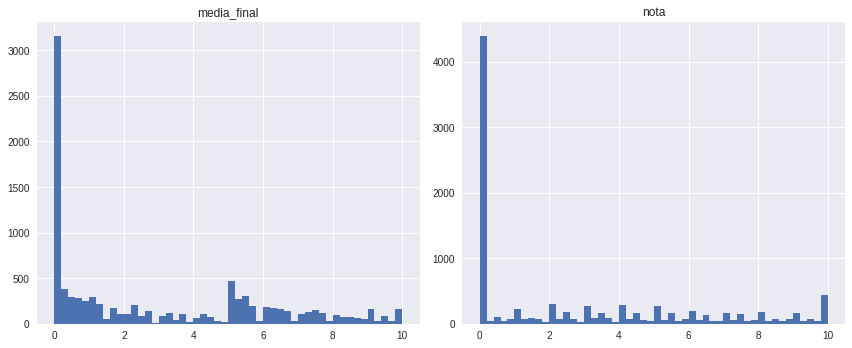

In [20]:
import matplotlib.pyplot as plt

df_finalSemDup[['media_final','nota']].hist(bins=50, figsize=(12,5))
plt.tight_layout()
plt.show()

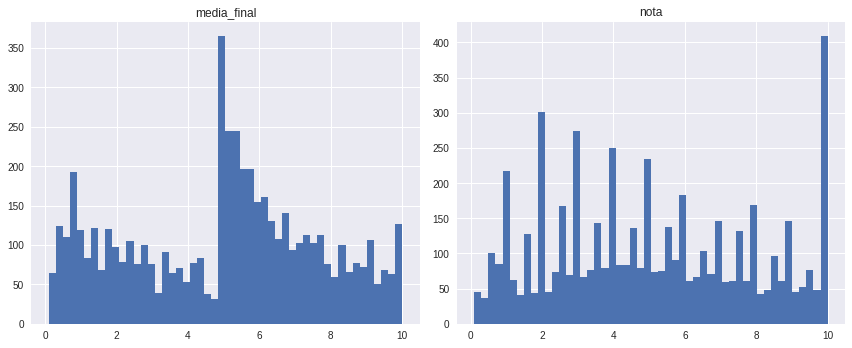

In [21]:
# retirando as notas zero pra ver melhor o comportamento das outras notas
sem_zero = df_finalSemDup[(df_finalSemDup['media_final']!=0) &
                          (df_finalSemDup['nota']!=0)]
sem_zero[['media_final','nota']].hist(bins=50, figsize=(12,5))
plt.tight_layout()
plt.show()

In [0]:
# criando um DataFrame onde as colunas são as notas das unidade
# função que retorna as colunas sendo as notas das unidades
# específica para o caso de 3 unidades
def cols_unidades(dataFrame):
  notas_1 = dataFrame[dataFrame['unidade']==1.0]
  notas_1 = notas_1[['discente','nota']]
  notas_1 = notas_1.rename(index=str, columns={"nota": "nota_1"})

  notas_2 = dataFrame[dataFrame['unidade']==2.0]
  notas_2 = notas_2[['discente','nota']]
  notas_2 = notas_2.rename(index=str, columns={"nota": "nota_2"})

  notas_3 = dataFrame[dataFrame['unidade']==3.0]
  notas_3 = notas_3[['discente','nota']]
  notas_3 = notas_3.rename(index=str, columns={"nota": "nota_3"})

  notas_12 = pd.merge(notas_1,notas_2,on='discente')
  df_porUnidade = pd.merge(notas_12,notas_3,on='discente')
  
  return df_porUnidade

In [23]:
df_porUnidade = cols_unidades(df_finalSemDup)
df_porUnidade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 0 to 3377
Data columns (total 4 columns):
discente    3378 non-null object
nota_1      3275 non-null float64
nota_2      3265 non-null float64
nota_3      3255 non-null float64
dtypes: float64(3), object(1)
memory usage: 132.0+ KB


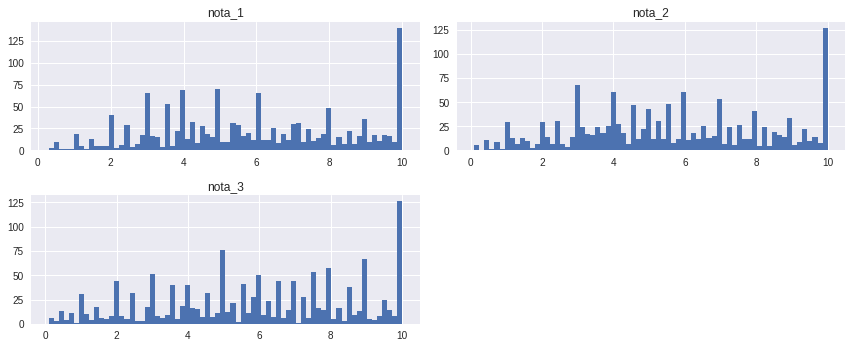

In [25]:
sem_zero2 = df_porUnidade[(df_porUnidade['nota_1']!=0) &
                          (df_porUnidade['nota_2']!=0) &
                          (df_porUnidade['nota_3']!=0)]

sem_zero2.hist(bins=70, figsize=(12,5))
plt.tight_layout()
plt.show()

## 2.6 Conjunto de Teste

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_finalSemDup, 
                                       test_size=0.2, 
                                       random_state=35)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(df_finalSemDup),len(train_set),len(test_set)))

data has 12388 instances
 9910 train instances
 2478 test intances


# 3.0 Visualizando os dados

In [0]:
treinamento = train_set.copy()

In [0]:
cols_train = ['descricao','discente','id_turma','media_final','nota','reposicao','unidade']
treinamento = treinamento[cols_train]

No handles with labels found to put in legend.


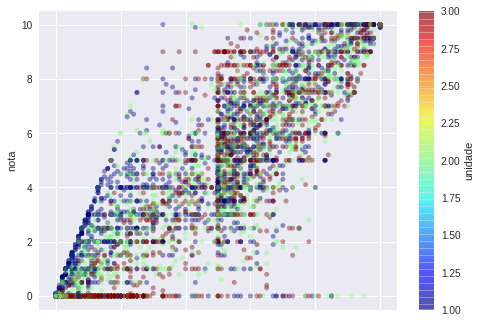

In [29]:
treinamento.plot(kind="scatter", x="media_final", y="nota", alpha=0.4,
           c="unidade", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

- Há uma concentração de notas aproximadamente zero na terceira unidade e essas pessoas obtiveram uma média final baixa.
- Há também um pequeno grupo que se deu bem nas notas da terceira unidade, aproximadamente 9 e sua média final está entre 5 e 6, mostra que se recuperaram ao longe das unidades.

In [30]:
corr_matrix = treinamento.corr()
corr_matrix["nota"].sort_values(ascending=False)

nota           1.000000
media_final    0.915609
unidade       -0.060077
Name: nota, dtype: float64

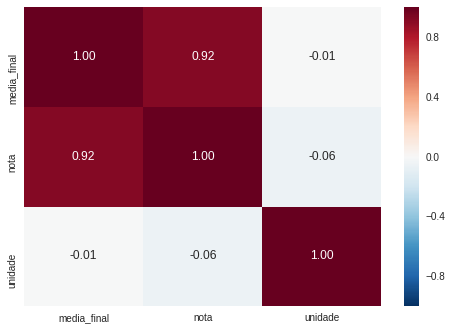

In [31]:
import seaborn as sns

sns.heatmap(treinamento.corr(), annot=True, fmt=".2f")

A correlação apenas confirma o que já é óbvio, que as notas das unidades influenciam na média final do discente.

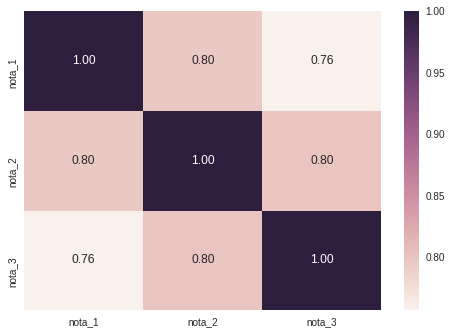

In [32]:
sns.heatmap(df_porUnidade.corr(), annot=True, fmt=".2f")

Acima, é possível observar a correlação entre as notas das unidades.

In [33]:
treinamento.head()

,descricao,discente,id_turma,media_final,nota,reposicao,unidade
1989,APROVADO POR NOTA,6383e6aacfd2aa8a91b33b04ed3db69a,1242595,5.7,2.3,t,2.0
10612,REPROVADO POR MÉDIA E POR FALTAS,abe06fe4287a886d52fc0e464cbe9819,57585724,0.0,0.0,f,3.0
14029,REPROVADO,83f9b88bb4e1b945543ebee90a3549e1,57585709,0.0,0.0,f,2.0
13842,REPROVADO,0f7491d43540602955431a8d7086914a,57585709,1.0,2.0,f,1.0
17031,REPROVADO,30d35140f1087638c8eab23835cc6c0f,57595053,3.6,2.2,f,1.0


# 4.0 Tratando os dados

In [60]:
train_setCopy = train_set.copy()

train_setUni = cols_unidades(train_setCopy)
print(train_setUni.shape)
train_setUni.info()

(1715, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 0 to 1714
Data columns (total 4 columns):
discente    1715 non-null object
nota_1      1668 non-null float64
nota_2      1664 non-null float64
nota_3      1659 non-null float64
dtypes: float64(3), object(1)
memory usage: 67.0+ KB


In [0]:
train_X = train_setUni.drop("nota_3", axis=1)

# y = nota da segunda unidade
train_y = train_setUni.nota_3.copy()


## 4.1 Limpeza de Dados

In [95]:
# vendo a quantidade de elementos ausentes
train_X.isnull().sum()

discente     0
nota_1      47
nota_2      51
dtype: int64

In [96]:
train_set.columns

Index(['descricao', 'discente', 'faltas_unidade', 'id_turma', 'media_final',
       'nota', 'numero_total_faltas', 'reposicao', 'unidade', 'anoperiodo'],
      dtype='object')

In [97]:
# substituindo os valores ausentes pela média dos outros valores
# da respectiva coluna

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# criando uma copia sem os elementos não numéricos
train_X_num = train_X.drop("discente", axis=1)

# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_X_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [98]:
imputer.statistics_

array([2.20000005, 1.5       ])

In [99]:
train_X_num.median().values

array([2.20000005, 1.5       ])

In [0]:
# substituindo os valores ausentes pela média encontrada
train_X_num_array = imputer.transform(train_X_num)
train_X_num_df = pd.DataFrame(train_X_num_array, columns=train_X_num.columns)

In [101]:
train_X_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 2 columns):
nota_1    1715 non-null float64
nota_2    1715 non-null float64
dtypes: float64(2)
memory usage: 26.9 KB


## 4.2 Transformadores Personalizados

In [0]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# indices das colunas
nota_1ix, nota_2ix = 0, 1

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  def __init__(self, add_uni1_pela_uni2 = True):
    self.add_uni1_pela_uni2 = add_uni1_pela_uni2
    
  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    denominador = X[:, nota_2ix]
    denominador[denominador<.000001] = .000001
    
    uni1_pela_uni2 = X[:, nota_1ix] / denominador
      
    return np.c_[X, uni1_pela_uni2]

## 4.3 Pipelines de Transformação

In [105]:
train_X_num_df.head()

,nota_1,nota_2
0,0.0,0.0
1,5.2,1.0
2,10.0,8.8
3,4.9,5.1
4,4.0,4.0


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())
                        ])
train_X_num_pipeline = num_pipeline.fit_transform(train_X_num_df)

In [114]:
train_X_num_pipeline

array([[-0.96772412, -0.86917306, -0.2892435 ],
       [ 0.66137704, -0.55927065, -0.28923781],
       [ 2.16516285,  1.85797067, -0.28924226],
       ...,
       [ 1.44459884,  2.04391225, -0.2892426 ],
       [-0.96772412, -0.86917306, -0.2892435 ],
       [-0.65443543, -0.86917306,  0.80434376]])

# 5.0 Selecionando e Treinando o Modelo

# 6.0 Melhorar o Modelo

# 7.0 Apresentando a Solução